# Estatísticas de domínios comuns no censo de Diários Oficiais

Agora temos uma funcionalidade no site do [Censo](https://censo.ok.org.br/) que permite baixar os dados do mapeamento.
A partir desses dados, podemos encontrar o domínio base dos diários oficiais e identificar
potenciais fontes para os _spiders_ do Querido Diário.

Para reproduzir esse notebook:
1. Acesse a página do [andamento do censo](https://censo.ok.org.br/andamento/#view) e faça o download dos dados
2. Coloque o arquivo na pasta `notebooks/`

In [2]:
# importa bibliotecas
from urllib.parse import urlparse
from functools import reduce
import pandas as pd

# carrega arquivo
df = pd.read_csv('base_mapeamento.csv', sep=',')

In [3]:
df = df[df['fonte_1'] != "None"] # ignora linhas onde o domínio é "None" (não há domínio)
df['dominio_base'] = df['fonte_1'].apply(lambda url: urlparse(url).netloc) # adiciona coluna com os domínios base ao dataframe

In [4]:
df.shape

(323, 18)

In [5]:
df["dominio_base"].describe()

count                            323
unique                           241
top       www.diariomunicipal.com.br
freq                              36
Name: dominio_base, dtype: object

In [6]:
df.head()

,municipio,IBGE,IBGE7,UF,regiao,populacao_2020,eh_capital,fonte_1,fonte_2,fonte_3,fonte_4,is_online,data_inicial,tipo_arquivo,validacao,navegacao,observacoes,dominio_base
0,Abaetetuba (PA),150010,1500107,PA,Região Norte,159080,False,http://www.diariomunicipal.com.br/famep/pesqui...,None,None,None,1,2016-06-30,HTML,True,None,NaN,www.diariomunicipal.com.br
1,Abreu e Lima (PE),260005,2600054,PE,Região Nordeste,100346,False,http://www.diariomunicipal.com.br/amupe/,None,None,None,1,None,PDF texto,True,None,O Diário Oficial do município de Abreu e Lima ...,www.diariomunicipal.com.br
2,Alagoinhas (BA),290070,2900702,BA,Região Nordeste,152327,False,https://doem.org.br/ba/alagoinhas,None,None,None,1,2015-01-28,PDF texto,True,None,None,doem.org.br
3,Almirante Tamandaré (PR),410040,4100400,PR,Região Sul,120041,False,http://www.diariomunicipal.com.br/amp/pesquisa...,None,None,None,1,2014-01-08,HTML,True,None,NaN,www.diariomunicipal.com.br
4,Altamira (PA),150060,1500602,PA,Região Norte,115969,False,http://altamira.pa.gov.br/site/download-catego...,None,None,None,1,2013-05-11,PDF imagem,True,None,NaN,altamira.pa.gov.br


## Domínios com maior população acumulada
1. A análise mostra que os dois domínios que atendem às maiores populações são os domínios das cidades de São Paulo e Rio de Janeiro, respectivamente em 1° e 2° lugares. 
2. Em 3°, o domínio www.diariomunicipal.com.br atende a uma população quase igual à da cidade do Rio de Janeiro, mas atendendo às populações de 36 municípios, espalhados em 10 estados.

In [28]:
df1 = df.groupby(["dominio_base"])['populacao_2020'].sum() # população total atendida pelo domínio
df2 = df.groupby(["dominio_base"])['municipio'].nunique() # total de municípios atendidos pelo domínio
df3 = df.groupby(["dominio_base"])['UF'].nunique() #total de estados atendidos pelo domínio

# cria dataframe com base nas três séries acima, renomeia colunas e ordena por número de municípios atendidos pelo domínio
data_frames = [df1, df2, df3]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['dominio_base'], how='outer'), data_frames)
df_merged.columns = ['População', 'Municípios', 'UFs']
df_merged.sort_values(['População'], ascending=False)[:20]

,População,Municípios,UFs
dominio_base,,,
www.docidadesp.imprensaoficial.com.br,12325232,1,1
doweb.rio.rj.gov.br,6747815,1,1
www.diariomunicipal.com.br,6674735,36,10
www.buriti.df.gov.br,3055149,1,1
www.dom.salvador.ba.gov.br,2886698,1,1
diariooficial.fortaleza.ce.gov.br,2686612,1,1
portal6.pbh.gov.br,2521564,1,1
diario.imprensaoficial.am.gov.br,2219580,1,1
legisladocexterno.curitiba.pr.gov.br,1948626,1,1


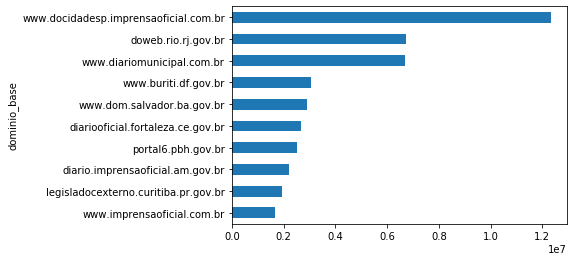

In [33]:
# Visualização dos 10 domínios que atendem às maiores populações
df_viz = df_merged['População'].sort_values(ascending=False)[:10]
ax = df_viz.plot.barh()
ax.invert_yaxis()

## Número de cidades com o mesmo domínio
1. Como mencionado, o domínio www.diariomunicipal.com.br atende a 36 municípios, espalhados por 10 estados e nas 5 regiões do Brasil.
2. Empatados em 2° lugar, os domínios www.diariooficial.rs.gov.br e www.diariooficial.rs.gov.br	atendem a 7 municípios cada, nos estados do Rio Grande do Sul e Santa Catarina, respectivamente.

In [8]:
df1 = df.groupby(["dominio_base"])["municipio"].count() # total de municípios atendidos pelo domínio
df2 = df.groupby(["dominio_base"])["UF"].nunique() # total de estados atendidos pelo domínio
df3 = df.groupby(["dominio_base"])["regiao"].nunique() # total de regiões atendidas pelo domínio

# cria dataframe com base nas três séries acima, renomeia colunas e ordena por número de municípios atendidos pelo domínio
data_frames = [df1, df2, df3]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['dominio_base'], how='outer'), data_frames)
df_merged.columns = ['Municípios', 'UFs', 'Regiões']
df_merged.sort_values(by=["Municípios"], ascending=False)[:10]

,Municípios,UFs,Regiões
dominio_base,,,
www.diariomunicipal.com.br,36,10,5
www.diariooficial.rs.gov.br,7,1,1
diariomunicipal.sc.gov.br,7,1,1
diariooficial.abc.go.gov.br,6,1,1
imprensaoficialmunicipal.com.br,6,1,1
www.jornalminasgerais.mg.gov.br,5,1,1
www.imprensaoficial.com.br,5,1,1
www.in.gov.br,4,3,2
www.ioepa.com.br,3,1,1


## Municípios atendidos pelo mesmo domínio, por estado
1. Neste item, o destaque vai para o estado do Pará, onde 18 municípios são atendidos com apenas 7 domínios. Assim, mais de 60% dos municípios desse estado não são atendidos por domínios exclusivos.

In [17]:
df1 = df.groupby(["UF"])['dominio_base'].count()
df2 = df.groupby(["UF"])['dominio_base'].nunique()
data_frames = [df1, df2, df1 - df2, (df1 - df2)/df1]

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['UF'], how='outer'), data_frames)
df_merged.columns = ['Municípios', 'Domínios', 'Diferença', '% de iguais']
df_merged = df_merged.sort_values(by=["% de iguais"], ascending=False)

# formata última coluna em %
df_merged.style.format({
    '% de iguais': '{:.2%}'.format,
})

,Municípios,Domínios,Diferença,% de iguais
UF,,,,
PA,18,7,11,61.11%
SC,13,6,7,53.85%
PE,14,7,7,50.00%
RS,19,10,9,47.37%
ES,9,5,4,44.44%
GO,14,9,5,35.71%
AM,3,2,1,33.33%
MG,33,25,8,24.24%
CE,9,7,2,22.22%


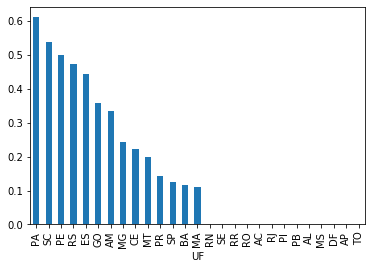

In [23]:
# Visualização da parcela de município que utilizam o mesmo domínio, por UF
df_merged['% de iguais'].plot.bar()

## Municípios atendidos pelo mesmo domínio, por região
1. Neste item, o destaque vai para a região Norte, onde 31 municípios são atendidos por apenas 18 domínios. Assim, mais de 40% dos municípios desse estado não são atendidos por domínios exclusivos.
2. Na outra ponta, a região Sudeste é a que possui um maior percentual de municípios atendidos por domínios exclusivos.
3. A análise sugere que o uso de domínios compartilhados com outros municípios pode ser uma estratégia de redução de custos ou de para mitigar a falta de infraestrutura ou mão de obra qualificada de TI.

In [35]:
df1 = df.groupby(['regiao'])['dominio_base'].count()
df2 = df.groupby(['regiao'])['dominio_base'].nunique()

data_frames = [df1, df2, df1 - df2, (df1 - df2)/df1]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['regiao'], how='outer'), data_frames)
df_merged.columns = ['Municípios', 'Domínios', 'Diferença', '% de iguais']
df_merged = df_merged.sort_values(by=["% de iguais"], ascending=False)

df_merged.style.format({
    '% de iguais': '{:.2%}'.format,
})

,Municípios,Domínios,Diferença,% de iguais
regiao,,,,
Região Norte,30,17,13,43.33%
Região Sul,53,32,21,39.62%
Região Centro-Oeste,24,17,7,29.17%
Região Nordeste,64,50,14,21.88%
Região Sudeste,152,130,22,14.47%


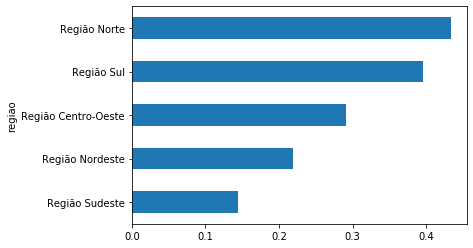

In [36]:
# Visualização da parcela de município que utilizam o mesmo domínio, por região
ax = df_merged['% de iguais'].plot.barh()
ax.invert_yaxis()